In [1]:
import copy
import csv
import math
import os
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import random
import networkx as nx


In [2]:
def calcDurationInHours(starting_time, ending_time):
    return (ending_time - starting_time).total_seconds() / 60 / 60

In [3]:
class Flights(object):
    legNo = ""
    airport_departure = ""
    date_departure = ""
    hour_departure = ""
    airport_arrival = ""
    date_arrival = ""
    hour_arrival = ""
    pairing_relation = ""
    date_time_arrival = None
    date_time_departure = None
    duration = 0

    # deadhead = False

    def __int__(self):
        self.legNo = self.legNo
        self.airport_departure = self.airport_departure
        self.date_departure = self.date_departure
        self.hour_departure = self.hour_departure
        self.airport_arrival = self.airport_arrival
        self.date_arrival = self.date_arrival
        self.hour_arrival = self.hour_arrival
        # self.pairing_relation = self.pairing_relation

    def setDateTime(self):
        self.date_time_departure = datetime.strptime(str(self.date_departure + ' ' + self.hour_departure), "%Y-%m-%d "
                                                                                                           "%H:%M")
        self.date_time_arrival = datetime.strptime(str(self.date_arrival + ' ' + self.hour_arrival), "%Y-%m-%d %H:%M")
        diff = self.date_time_arrival - self.date_time_departure
        seconds_in_hours = diff.seconds / 60 / 60
        days_in_hours = diff.days * 24
        self.duration = seconds_in_hours + days_in_hours

    def __eq__(self, other):
        return self.legNo == other.legNo

    def __hash__(self):
        return hash(('legNo', self.legNo))


In [4]:
class Duties(object):
    legs: list[Flights] = []
    start_date_time = None
    end_date_time = None
    starting_airport = ""
    ending_airport = ""
    total_flying_time = 0
    total_duration = 0

    def __init__(self, legs: list[Flights]):
        dur = 0
        self.legs = legs
        self.start_date_time = legs[0].date_time_departure
        self.end_date_time = legs[-1].date_time_arrival
        self.starting_airport = legs[0].airport_departure
        self.ending_airport = legs[-1].airport_arrival
        for l3g in legs:
            dur += (l3g.date_time_arrival-l3g.date_time_departure).total_seconds()/60/60
        self.total_flying_time = dur
        self.total_duration = (self.end_date_time - self.start_date_time).total_seconds() / 60 / 60


In [5]:
class Pairings(object):
    legs: list[Flights] = []
    start_date_time = None
    end_date_time = None
    base_airport = ""
    total_duration = 0
    total_flying_time = 0
    cost = 0

    def __init__(self, fls: list[Flights]):
        self.legs = []

        self.legs = fls
        for l3g in self.legs:
            self.total_flying_time += calcDurationInHours(l3g.date_time_departure, l3g.date_time_arrival)
        # self.total_flying_time += dty.total_flying_time
        self.start_date_time = self.legs[0].date_time_departure
        self.end_date_time = self.legs[-1].date_time_arrival
        self.base_airport = self.legs[0].airport_departure
        # self.total_flying_time = reduce(mul, [x.total_flying_time for x in duties])
        self.total_duration = calcDurationInHours(self.start_date_time, self.end_date_time)

    def __eq__(self, other):
        return self.legs == other.legs

In [6]:
class Airport(object):
    name = ""
    is_base = None

    def __init__(self):
        self.name = self.name
        self.is_base = self.is_base

In [164]:
flights = {}
tempFlights = []
for day in range(31):
    path = os.getcwd() + '\instance1\day_' + str(day + 1) + '.csv'
    first = True
    with open(path) as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            if not row:
                continue
            elif first:
                first = False
                continue
            elif len(row) <= 6:
                continue
            else:
                f = Flights()
                f.legNo = row[0].strip()
                f.airport_departure = row[1].strip()
                f.date_departure = row[2].strip()
                f.hour_departure = row[3].strip()
                f.airport_arrival = row[4].strip()
                f.date_arrival = row[5].strip()
                f.hour_arrival = row[6].strip()
                key = str(f.legNo.strip())
                # covered[key] = (False, 0)
                f.setDateTime()
                tempFlights.append(f)

tempFlights.sort(key=lambda x: x.date_time_arrival, reverse=False)
for flight in tempFlights:
    flights[flight.legNo] = flight
flights

{'LEG_01_0': <__main__.Flights at 0x170922aa4a0>,
 'LEG_01_1': <__main__.Flights at 0x170922aaa40>,
 'LEG_01_30': <__main__.Flights at 0x170922a83d0>,
 'LEG_01_18': <__main__.Flights at 0x170922a8340>,
 'LEG_01_6': <__main__.Flights at 0x170922a88b0>,
 'LEG_01_31': <__main__.Flights at 0x170922a9cf0>,
 'LEG_01_2': <__main__.Flights at 0x170922a9c30>,
 'LEG_01_11': <__main__.Flights at 0x170922a89d0>,
 'LEG_01_26': <__main__.Flights at 0x170922a8370>,
 'LEG_01_21': <__main__.Flights at 0x170922a9960>,
 'LEG_01_15': <__main__.Flights at 0x170922a8490>,
 'LEG_01_28': <__main__.Flights at 0x170922aaef0>,
 'LEG_01_3': <__main__.Flights at 0x170922aa080>,
 'LEG_01_8': <__main__.Flights at 0x170922a81c0>,
 'LEG_01_16': <__main__.Flights at 0x170922a9210>,
 'LEG_01_19': <__main__.Flights at 0x170922a8bb0>,
 'LEG_01_12': <__main__.Flights at 0x170922a8070>,
 'LEG_01_4': <__main__.Flights at 0x170922a9060>,
 'LEG_01_33': <__main__.Flights at 0x170922a87c0>,
 'LEG_01_29': <__main__.Flights at 0x1

In [165]:
airports = {}
# bases = {}
path = os.getcwd() + '\instance1\listOfBases.csv'
with open(path) as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    first = True
    for row in reader:
        if not first:
            a = Airport()
            a.name = row[0].strip()
            if int(row[1]):
                a.is_base = True
                # bases[a.name] = a
            else:
                a.is_base = False
            airports[a.name] = a
        else:
            first = False


In [166]:
# g = Graph()
g = nx.DiGraph()

In [167]:
for airport in airports.keys():
    g.add_node(airport)


In [168]:
for flight in flights.items():
    day = int(flight[1].legNo[4:6])
    if not g.has_edge(flight[1].airport_departure, flight[1].airport_arrival):
        g.add_edge(flight[1].airport_departure, flight[1].airport_arrival, flight_list = {f"{flight[1].legNo}": (flight[1], False, day)}, weight=flight[1].duration)
    else:
        orig = g[flight[1].airport_departure][flight[1].airport_arrival]["flight_list"]
        orig[flight[1].legNo] = (flight[1], False, day)
        new_attr = {(flight[1].airport_departure, flight[1].airport_arrival) : {"flight_list" : orig}}
        nx.set_edge_attributes(g, new_attr)

In [ ]:
[e for e in g.edges.data("flight_list")]

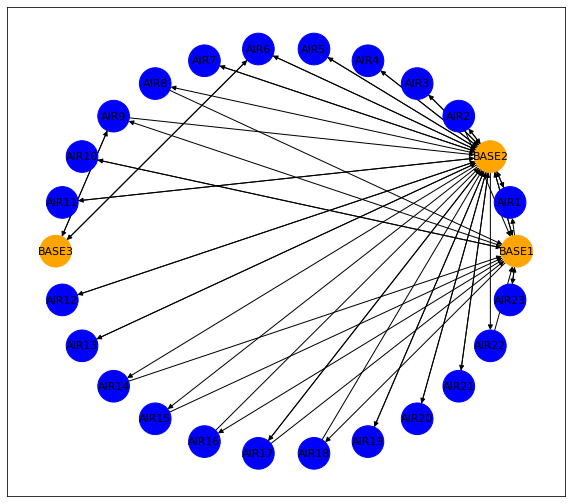

In [193]:
pos = nx.circular_layout(g)
# pos["AIR17"] = [-0.5, 0.2]
# pos["AIR1"] = [0.07, -0.21901309]
# pos["AIR22"] = [0.65106971, -0.25]
c_m = {}
for item in airports.items():
    if item[1].is_base:
        c_m[item[1].name] = "orange"
    else:
        c_m[item[1].name] = "blue"
colors = [c_m.get(node) for node in g.nodes()]
plt.figure(figsize= (10,9))
nx.draw_networkx(g, pos, node_size=1000, font_size=11, node_color=colors)

In [170]:
def validPairing(curr: list[Flights]) -> tuple[int, int]:
    kp = 1
    ct = 1
    length_curr = len(curr)
    tempP = Pairings(curr)
    if tempP.total_flying_time / tempP.total_duration * 100 < allowedRatio:
        kp = 0
        # if tempP.total_flying_time / tempP.total_duration * 100 < 20:
        #     return 0, 0
        # print("low ratio")

    if tempP.base_airport != curr[-1].airport_arrival:
        kp = 0
        # print("non base")

    if tempP.total_duration > 72:
        # print("too long")
        return 0, 0

    layover_timer = 0
    for i, fl in enumerate(curr):
        if length_curr != i+1:
            flight_diff = calcDurationInHours(fl.date_time_arrival, curr[i+1].date_time_departure)
            if flight_diff < 0.25:
                # print("flight diff constraint violated")
                return 0, 0

            layover_timer += calcDurationInHours(fl.date_time_departure, curr[i+1].date_time_departure)

            if flight_diff >= 8:
                layover_timer = 0
            elif layover_timer > 8:
                # print("layover constraint violated")
                return 0, 0


    return kp, ct

In [171]:
def searchPairings(current: list[Flights], pairings: list[Pairings]) -> list[Pairings]:
    keep, cont = validPairing(current)
    if keep:
        p = Pairings(copy.deepcopy(current))
        pairings.append(p)
    if cont:
        first_leg = current[0]
        last_leg = current[-1]
        for ed in g.out_edges(last_leg.airport_arrival):
            for fl_ed in g[ed[0]][ed[1]]["flight_list"].items():
                f_inner : Flights = fl_ed[1][0]
                if calcDurationInHours(first_leg.date_time_departure, f_inner.date_time_arrival) > 72:
                    break
                if calcDurationInHours(last_leg.date_time_arrival, f_inner.date_time_departure) >= 0.25:
                    current.append(f_inner)
                    pairings = searchPairings(current, pairings)
                    current.remove(f_inner)
    return pairings

In [172]:
all_pairings = []
allowedRatio = 25
for airport in airports.items():
    air = airport[1]
    air: Airport
    if air.is_base:
        print(air.name)
        for edge in g.out_edges(air.name):
            print(edge)
            for flight in g[edge[0]][edge[1]]["flight_list"].items():
                f : Flights = flight[1][0]
                # print(f.legNo)

                new_pairings = searchPairings([f], [])
                print(len(new_pairings))
                all_pairings.extend(new_pairings)
            print("--")

BASE1
('BASE1', 'AIR1')
7
7
5
5
21
15
4
0
--
('BASE1', 'AIR9')
63
9
63
9
49
10
32
8
36
6
63
9
63
9
63
9
63
9
49
10
32
8
45
10
81
13
63
7
63
7
63
7
45
4
34
8
20
3
63
7
63
7
63
7
63
7
35
6
8
2
12
4
47
47
28
4
0
--
('BASE1', 'AIR10')
3
3
4
3
3
3
3
3
3
4
3
4
3
3
3
1
6
2
3
3
3
3
3
2
1
--
('BASE1', 'AIR16')
9
13
6
--
('BASE1', 'BASE2')
35
2
52
--
('BASE1', 'AIR18')
5
--
('BASE1', 'AIR23')
3
3
1
0
--
BASE2
('BASE2', 'AIR12')
116
466
116
393
76
168
26
109
57
343
94
466
116
466
116
466
116
393
76
168
26
109
54
303
67
370
87
17
69
55
--
('BASE2', 'AIR6')
315
315
159
110
56
315
315
315
159
110
53
172
137
137
122
34
19
137
137
137
111
53
69
54
107
54
95
40
9
4
2
--
('BASE2', 'AIR3')
486
486
199
123
53
246
486
486
486
199
123
48
169
313
294
294
202
83
89
294
294
294
170
114
24
224
71
187
71
143
15
18
3
1
--
('BASE2', 'AIR2')
184
311
184
311
87
104
50
70
21
181
300
184
311
184
311
184
311
87
104
50
70
23
160
271
63
95
26
63
95
26
53
90
33
40
52
20
42
41
9
24
19
22
26
63
95
26
63
95
26
63
95
26
35
49

In [174]:
len(all_pairings)

52723

In [175]:
def init_cover_list() -> dict:
    cvrd = {}
    for fl in flights:
        cvrd[fl] = (False, 0)
    return cvrd

In [176]:
def getNonCoveredFlights(cvrd) -> list[Flights]:
    not_covered_flights = []
    for cov in cvrd.items():
        if not cov[1][0]:
            print(cov)
            not_covered_flights.append(cov)
    return not_covered_flights

In [177]:
covered = init_cover_list()
for pairing in all_pairings:
    pairing : Pairings
    for leg in pairing.legs:
        covered[leg.legNo] = (True, covered[leg.legNo][1]+1)

non_covrd = getNonCoveredFlights(covered)
print(non_covrd)

[]


In [178]:

while len(non_covrd) != 0:
    list_of_non_cvrd = [e[0] for e in non_covrd]
    allowedRatio = 25
    for airport in airports.items():
        air = airport[1]
        air: Airport
        if air.is_base:
            print(air.name)
            for edge in g.out_edges(air.name):
                print(edge)
                for flight in g[edge[0]][edge[1]]["flight_list"].items():
                    delete = True
                    f : Flights = flight[1][0]
                    # print(f.legNo)

                    new_pairings = searchPairings([f], [])
                    temp_new_pairings = new_pairings[:]
                    for pair in new_pairings:
                        for leg in pair.legs:
                            if leg.legNo in list_of_non_cvrd:
                                delete = False
                        if delete:
                            temp_new_pairings.remove(pair)

                    print(len(temp_new_pairings))
                    all_pairings.extend(temp_new_pairings)
                print("--")
    for pairing in all_pairings:
        pairing : Pairings
        for leg in pairing.legs:
            covered[leg.legNo] = (True, covered[leg.legNo][1]+1)
    non_covrd = getNonCoveredFlights(covered)
    allowedRatio -= 5

In [179]:
msg = []
pop_dict = {}
for i, pairing in enumerate(all_pairings):
    pairing: Pairings
    display = ""
    for leg in pairing.legs:
        display += leg.legNo + "->"
        if leg.legNo in pop_dict:
            pop_dict[leg.legNo].append(pairing)
        else:
            pop_dict[leg.legNo] = [pairing]
    msg.append("".join(["Pairing ", str(i + 1), ": ", display[:len(display) - 2]]))
    msg.append("".join(["Total Time:", str(pairing.total_duration)]))
    msg.append("".join(["Total Flying Time:", str(pairing.total_flying_time)]))
    msg.append("--------------")

with open('pairings.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(msg))

print("Total Pairings:", len(all_pairings))

Total Pairings: 52723


In [180]:
# with open("covered.txt", 'w') as file:
#     for key, value in covered.items():
#         file.write('%s:%s\n' % (key, value))

In [181]:
# pairings_base_1 = {}
# pairings_base_2 = {}
# pairings_base_3 = {}
# for i, pair in enumerate(all_pairings):
#     if pair.base_airport == "BASE1":
#         pairings_base_1["Pairing" + str(i)] = pair
#     elif pair.base_airport == "BASE2":
#         pairings_base_2["Pairing" + str(i)] = pair
#     elif pair.base_airport == "BASE3":
#         pairings_base_3["Pairing" + str(i)] = pair
#
# print()

In [182]:
def checkSimilarity(cvd, t_pairing: Pairings) -> int:
    total_legs = len(t_pairing.legs)
    present_legs = 0
    for Leg in t_pairing.legs:
        if cvd[Leg.legNo][0]:
            present_legs += 1
    return present_legs/total_legs * 100

In [183]:
def checkCovered(cvd) -> bool:
    covrd = True
    counter = 0
    for it in cvd.items():
        if not it[1][1]:
            covrd = False
            break
            # counter+=1
    # print(counter)
    return covrd

In [184]:
def correction_algortihm(solution, covered_flights):
    non_covered = getNonCoveredFlights(covered_flights)
    print(non_covered)
    print(len(non_covered))
    for to_cover in non_covered:
        minimum_sim = (100, -1)
        for j, itm in enumerate(pop_dict[flights[to_cover[0]].legNo]):
            sim = checkSimilarity(covered_flights, itm)
            if sim<minimum_sim[0]:
                minimum_sim = (sim, j)
        #
        # if flights[to_cover[0]].legNo == "LEG_01_12":
        #     print()

        solution.append(pop_dict[flights[to_cover[0]].legNo][minimum_sim[1]])
        for Leg in pop_dict[flights[to_cover[0]].legNo][minimum_sim[1]].legs:
            covered_flights[Leg.legNo] = (True, covered_flights[Leg.legNo][1]+1)
    return solution, covered_flights

In [185]:
def find_random_solution():
    solution = []
    covered_flights = init_cover_list()
    temp_pairings = all_pairings[:]
    # print("Copied!")
    not_covered = False
    # iterations = 0
    similarity = 0
    not_found_in = 0
    # print("similarity: 0", end="")
    while not not_covered and similarity < 95:
        # iterations+=1
        index = random.randint(0, len(temp_pairings)-1)
        if len(solution) == 0:
            solution.append(temp_pairings[index])
            for Leg in temp_pairings[index].legs:
                covered_flights[Leg.legNo] = (True, covered_flights[Leg.legNo][1]+1)
            del temp_pairings[index]
            not_found_in = 0
        else:
            sim = checkSimilarity(covered_flights, temp_pairings[index])
            if sim <= similarity:
                solution.append(temp_pairings[index])
                for Leg in temp_pairings[index].legs:
                    covered_flights[Leg.legNo] = (True, covered_flights[Leg.legNo][1]+1)
                del temp_pairings[index]
                not_found_in = 0
            else:
                not_found_in += 1
        if not_found_in >= len(temp_pairings)/2:
            similarity += 5
            # print(", ", similarity, sep="", end="")
            not_found_in = 0
        not_covered = checkCovered(covered_flights)
    # print()
    if not not_covered:
        solution, covered_flights = correction_algortihm(solution, covered_flights)
    return solution, covered_flights

In [186]:
def calcDeadheadsFromCover(cov):
    j = 0
    for it in cov.items():
        # print(item)
        if it[1][1] > 1:
            j+=(it[1][1]-1)
    return j

In [187]:
def calcDeadheadsAlt(sol):
    j = 0
    cov = init_cover_list()
    for pr in sol:
        for Leg in pr.legs:
            cov[Leg] = (True, cov[Leg][1]+1)
    for it in cov.items():
        # print(item)
        if it[1][1] > 1:
            j+=(it[1][1]-1)
    return j

In [188]:
def calcDeadheadsFromSolution(sol):
    j = 0
    cov = init_cover_list()
    for pr in sol:
        for Leg in pr.legs:
            cov[Leg.legNo] = (True, cov[Leg.legNo][1]+1)
    for it in cov.items():
        # print(item)
        if it[1][1] > 1:
            j+=(it[1][1]-1)
    return j

In [189]:
solutions = {}
covered_list = []

for i in range(100):

    solutions[i+1], covered_list = find_random_solution()
    dh = calcDeadheadsFromCover(covered_list)
    print("Solution", i+1, sep=" ", end="\n")
    print("Deadheads:", dh, " out of ", len(flights), sep="")
    print("Solution Length: ", len(solutions[i+1]), sep="")

Solution 1
Deadheads:286 out of 1013
Solution Length: 246
Solution 2
Deadheads:312 out of 1013
Solution Length: 268
Solution 3
Deadheads:290 out of 1013
Solution Length: 245
Solution 4
Deadheads:280 out of 1013
Solution Length: 248
Solution 5
Deadheads:264 out of 1013
Solution Length: 246
Solution 6
Deadheads:253 out of 1013
Solution Length: 236
Solution 7
Deadheads:278 out of 1013
Solution Length: 245
Solution 8
Deadheads:270 out of 1013
Solution Length: 241
Solution 9
Deadheads:298 out of 1013
Solution Length: 241
Solution 10
Deadheads:304 out of 1013
Solution Length: 264
Solution 11
Deadheads:280 out of 1013
Solution Length: 237
Solution 12
Deadheads:272 out of 1013
Solution Length: 246
Solution 13
Deadheads:290 out of 1013
Solution Length: 249
Solution 14
Deadheads:282 out of 1013
Solution Length: 245
Solution 15
Deadheads:272 out of 1013
Solution Length: 238
Solution 16
Deadheads:309 out of 1013
Solution Length: 243
Solution 17
Deadheads:265 out of 1013
Solution Length: 258
Soluti

In [154]:
def calcPairingCost(p_toCalc: Pairings) -> float:
    # num_legs = len(pair.legs)
    # TAFB = pair.total_duration
    # total_duty_cost = max([0, TAFB * 4 / 7, pair.total_flying_time])
    # c = max([num_legs * 5, TAFB * 2 / 7, total_duty_cost])
    return math.floor(1000*p_toCalc.total_duration/p_toCalc.total_flying_time)

In [155]:
def calcSolutionCost(pairs: list[Pairings], deadheads:int) -> float:
    c = 0
    for pr in pairs:
        c+=calcPairingCost(pr)
    c+= deadheads*1000
    return c

In [190]:
class Solution(object):
    id = ""
    solution_pairings = []
    solution_cost = 0
    deadheads = 0

population = []
for i, item in enumerate(solutions.items()):
    s = Solution()
    s.id = i
    s.solution_pairings = item[1]
    s.deadheads = calcDeadheadsFromSolution(item[1])
    s.solution_cost = calcSolutionCost(item[1], s.deadheads)

    population.append(s)

# solution_costs = {}
# for i, item in enumerate(solutions.items()):
#     solution_costs[i] = calcSolutionCost(item[1], calcDeadheadsFromSolution(item[1]))

In [157]:
population

In [112]:
class PairingAlt(object):
    pairing_name = ""
    base = ""
    legs = {}
    start_date = ""
    start_time = ""
    end_date = ""
    end_time = ""
    total_flying_time = ""
    total_duration = 0

    def __int__(self):
        self.pairing_name = self.pairing_name
        self.base = self.base
        self.legs = self.legs
        self.start_date = self.start_date
        self.start_time = self.start_time
        self.end_date = self.end_date
        self.end_time = self.end_time
        self.total_flying_time = self.total_flying_time
        self.total_duration = self.total_duration


In [113]:
genesisPair = []
path = os.getcwd() + '\instance1\initialSolution.in'
with open(path) as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    for row in reader:
        # print(row)
        # print('----------------------------')
        if not row:
            continue
        elif len(row[0]) <= 15:
            #  Do not do anything if the row is does not contain pairing information
            continue
        else:
            P = PairingAlt()
            main_index = row[0].find(': Base')  # Setting the index as a limit on which to extract string of row
            P.pairing_name = row[0][0: main_index - 1].strip()
            # Setting the index as a limit on which to extract string of row
            if 'TDH' in row[0]:
                main_index = row[0].find(': TDH')
            else:
                main_index = row[0].find(': LEG')
            sub_index = row[0].find('BASE')  # Getting starting index from which to extract
            P.base = row[0][sub_index:main_index - 1].strip()
            num = len(row[1:])

            holder = [row[0][main_index + 1:].strip()]
            for n in range(num):
                if ';' in row[n + 1]:
                    holder.append(row[n + 1][0:-1].strip())
                else:
                    holder.append(row[n + 1].strip())

            P.legs = holder
            key = str(P.pairing_name.strip())  # Key prefixed with instance number

            #  Setting Key for flight search
            first_leg = str(P.legs[0])
            last_leg = str(P.legs[-1])

            #  Removing TDH when searching for a Key
            if 'TDH_' in first_leg:
                first_leg = first_leg.replace("TDH_", "")
            P.start_date = flights[first_leg].date_departure
            P.start_time = flights[first_leg].hour_departure
            if 'TDH_' in last_leg:
                last_leg = last_leg.replace("TDH_", "")
            P.end_date = flights[last_leg].date_arrival
            P.end_time = flights[last_leg].hour_arrival

            # Calculating the credited flying time for a pairing
            total_flying_time = 0
            for k, p in enumerate(P.legs):
                    if 'TDH' in p:
                        p = p.replace("TDH_", "")
                        P.legs[k] = p.replace("TDH_", "")
                    total_flying_time += flights[p].duration
            P.total_flying_time = total_flying_time
            P.total_duration = calcDurationInHours(flights[P.legs[0]].date_time_departure, flights[P.legs[-1]].date_time_arrival)

            genesisPair.append(P)

In [114]:
# genesisPair
# for pair in genesisPair:
#     for k, l3g in enumerate(pair.legs):
#         if 'TDH' in l3g:
#             pair.legs[k] = l3g.replace("TDH_", "")
# # a_cost = 0
# for pairing in genesisPair:
print(calcSolutionCost(genesisPair, calcDeadheadsAlt(genesisPair)))


507808


In [ ]:
# GA generate 100 solutions randomly -- done
# Genesis solution has to be one of the starting 100 -- can be done
# Shall always use the best solutions for the following (The best 10 must ALWAYS go in)
# have a way of determining if a solution is valid or not. //Genetic repair to fix it
#   crossover operator - from the solution ex. you get one pairing from one and another and you star picking from one to another and you do it until a certain point you must repair it.
# Genetic operators are SUPER important
# fitness func use cost
# take the init population and create another 500 from crossover, order them by cost, create another 100 and use prob tournament
# take another population

#VIMP -- Every solution has to be a unique code - to track if a solution makes it from solution to solution and how it was born and how it died. Some will survive but won't be the best and we must know this. -- solution object created

# how many at each generation are new, average lifespan - lower the better as you are getting better ones.

In [195]:
# Sort Solutions by cost (desc)
def sort_by_cost():
    population.sort(key=lambda x: x.solution_cost, reverse=False)

In [194]:
sort_by_cost()
for item in population:
    print(item.solution_cost)

982707
994696
997112
1004931
1012896
1021060
1021555
1022597
1023864
1024350
1028910
1030091
1030961
1031538
1031784
1034914
1035214
1037002
1039935
1040652
1040812
1041085
1042453
1043022
1044411
1044440
1045033
1045238
1045423
1045718
1046269
1047714
1047929
1047957
1050011
1051421
1052482
1053255
1054028
1054528
1055480
1055480
1056628
1057146
1058177
1058863
1059559
1060343
1060386
1060651
1061995
1063170
1063427
1064584
1065415
1065444
1066298
1067368
1068548
1068865
1071233
1072565
1072705
1073741
1074136
1074952
1075607
1075911
1076351
1076564
1076612
1078866
1080009
1080660
1083654
1083702
1083990
1084319
1086778
1089470
1092844
1093248
1093895
1095229
1095717
1096998
1097372
1098364
1101006
1102066
1107699
1109604
1111340
1116383
1116724
1118854
1120723
1127250
1128180
1136453
